In [2]:
import pandas as pd
import numpy as np
from sklearn import linear_model

In [4]:
!pip install word2number

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for word2number: filename=word2number-1.1-py3-none-any.whl size=5589 sha256=36d583a415daba36ead41970fa6f43c68e11398755bed5a42f9701737f4edf97
  Stored in directory: c:\users\kiit\appdata\local\pip\cache\wheels\5b\79\fb\d25928e599c7e11fe4e00d32048cd74933f34a74c633d2aea6
Successfully built word2number


In [6]:
from word2number import w2n

In [8]:
df=pd.read_csv("hiring.csv")

In [10]:
df.head()

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000


In [12]:
df['experience'] = df['experience'].fillna('zero')

# Convert all values in 'experience' to strings
df['experience'] = df['experience'].astype(str)

# Apply word_to_num to convert word numbers to numeric values
df['experience'] = df['experience'].apply(w2n.word_to_num)

# Verify the transformation
print(df)

   experience  test_score(out of 10)  interview_score(out of 10)  salary($)
0           0                    8.0                           9      50000
1           0                    8.0                           6      45000
2           5                    6.0                           7      60000
3           2                   10.0                          10      65000
4           7                    9.0                           6      70000
5           3                    7.0                          10      62000
6          10                    NaN                           7      72000
7          11                    7.0                           8      80000


In [18]:
mean_test_score=df['test_score(out of 10)'].mean()

In [20]:
df['test_score(out of 10)'] = df['test_score(out of 10)'].fillna(mean_test_score)

In [22]:
print(df)

   experience  test_score(out of 10)  interview_score(out of 10)  salary($)
0           0               8.000000                           9      50000
1           0               8.000000                           6      45000
2           5               6.000000                           7      60000
3           2              10.000000                          10      65000
4           7               9.000000                           6      70000
5           3               7.000000                          10      62000
6          10               7.857143                           7      72000
7          11               7.000000                           8      80000


In [44]:
from sklearn.linear_model import LinearRegression

# Define the features (independent variables) and target (dependent variable)
X = df[['experience', 'test_score(out of 10)', 'interview_score(out of 10)']]  # Features
y = df['salary($)']  # Target

# Initialize the Linear Regression model
model = LinearRegression()


model.fit(X_train, y_train)

# Print the coefficients and intercept
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

# Make a prediction (example: experience=2, test_score=9, interview_score=6)
sample_input = [[2, 9, 6]]
predicted_salary = model.predict(sample_input)
print("Predicted Salary:", predicted_salary[0])

Coefficients: [2716.4868386  2126.92037616 1612.77951649]
Intercept: 20722.331847729416
Predicted Salary: 54974.266009287465


C:\Users\KIIT\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [46]:
from sklearn.model_selection import train_test_split

# Define features (independent variables) and target (dependent variable)
X = df[["experience", "test_score(out of 10)", "interview_score(out of 10)"]]  # Select feature columns
y = df["salary($)"]  # Select target column

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the results to verify
print("X_train:")
print(X_train)
print("X_test:")
print(X_test)
print("y_train:")
print(y_train)
print("y_test:")
print(y_test)


X_train:
   experience  test_score(out of 10)  interview_score(out of 10)
0           0               8.000000                           9
7          11               7.000000                           8
2           5               6.000000                           7
4           7               9.000000                           6
3           2              10.000000                          10
6          10               7.857143                           7
X_test:
   experience  test_score(out of 10)  interview_score(out of 10)
1           0                    8.0                           6
5           3                    7.0                          10
y_train:
0    50000
7    80000
2    60000
4    70000
3    65000
6    72000
Name: salary($), dtype: int64
y_test:
1    45000
5    62000
Name: salary($), dtype: int64


In [32]:
import pandas as pd
import numpy as np

# Assuming df is your DataFrame
# Extract the 'salary($)' column as a NumPy array
y = df.iloc[:, -1].values  # Assuming 'salary($)' is the last column

# Print the array to verify
print("Original y array:")
print(y)

# Reshape y into a 2D array with one column
y = y.reshape(-1, 1)

# Print the reshaped array
print("Reshaped y array:")
print(y)

# If needed, this reshaped array can now be used in further machine learning pipelines.


Original y array:
[50000 45000 60000 65000 70000 62000 72000 80000]
Reshaped y array:
[[50000]
 [45000]
 [60000]
 [65000]
 [70000]
 [62000]
 [72000]
 [80000]]


In [48]:
from sklearn.metrics import mean_squared_error, r2_score
# Predict the target for X_test
y_pred = model.predict(X_test)


# Assuming y_test and y_pred are defined
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the results
print("Mean Squared Error:", mse)
print("R2 Score:", r2)


Mean Squared Error: 5144804.270092902
R2 Score: 0.9287916364000982


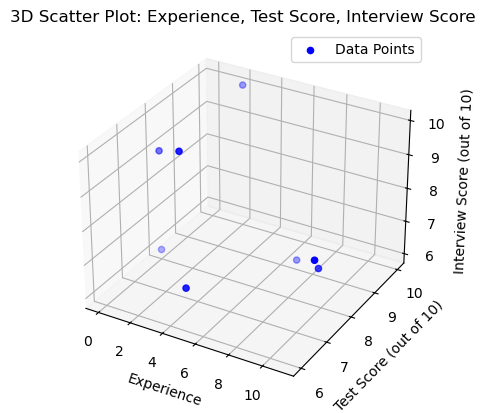

In [54]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# 3D Scatter plot
ax.scatter(df["experience"], df["test_score(out of 10)"], df["interview_score(out of 10)"], color="blue", label="Data Points")

# Add labels
ax.set_xlabel("Experience")
ax.set_ylabel("Test Score (out of 10)")
ax.set_zlabel("Interview Score (out of 10)")

# Add title and legend
plt.title("3D Scatter Plot: Experience, Test Score, Interview Score")
plt.legend()

# Show the plot
plt.show()

